In [1]:
"""
Understanding the Columns:

Timestamp
Age
Gender
Country
state: If you live in the United States, which state or territory do you live in?
self_employed: Are you self-employed?
family_history: Do you have a family history of mental illness?
treatment: Have you sought treatment for a mental health condition?
work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
no_employees: How many employees does your company or organization have?
remote_work: Do you work remotely (outside of an office) at least 50% of the time?
tech_company: Is your employer primarily a tech company/organization?
benefits: Does your employer provide mental health benefits?
care_options: Do you know the options for mental health care your employer provides?
wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
leave: How easy is it for you to take medical leave for a mental health condition?
mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
coworkers: Would you be willing to discuss a mental health issue with your coworkers?
physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
comments: Any additional notes or comments
"""

'\nUnderstanding the Columns:\n\nTimestamp  \nAge  \nGender  \nCountry  \nstate: If you live in the United States, which state or territory do you live in?  \nself_employed: Are you self-employed?  \nfamily_history: Do you have a family history of mental illness?  \ntreatment: Have you sought treatment for a mental health condition?  \nwork_interfere: If you have a mental health condition, do you feel that it interferes with your work?  \nno_employees: How many employees does your company or organization have?  \nremote_work: Do you work remotely (outside of an office) at least 50% of the time?  \ntech_company: Is your employer primarily a tech company/organization?  \nbenefits: Does your employer provide mental health benefits?  \ncare_options: Do you know the options for mental health care your employer provides?  \nwellness_program: Has your employer ever discussed mental health as part of an employee wellness program?  \nseek_help: Does your employer provide resources to learn more

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

ds = pd.read_csv("survey.csv")
ds.info()
ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
ds["Gender"].info()
print(ds["Gender"].isnull())
print(ds['Gender'].unique())
print(ds['Gender'].nunique())

<class 'pandas.core.series.Series'>
RangeIndex: 1259 entries, 0 to 1258
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
1259 non-null   object
dtypes: object(1)
memory usage: 10.0+ KB
0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Name: Gender, Length: 1259, dtype: bool
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
49


In [4]:
gender_map = {
    # Male
    'Male ': 'Male', 'male': 'Male', 'M': 'Male', 'm': 'Male', 'Male': 'Male',
    'Cis Male': 'Male', 'Man': 'Male', 'cis male': 'Male', 'Mail': 'Male',
    'Male-ish': 'Male', 'Male (CIS)': 'Male', 'Cis Man': 'Male', 'msle': 'Male',
    'Malr': 'Male', 'Mal': 'Male', 'maile': 'Male', 'Make': 'Male',

    # Female
    'Female ': 'Female', 'female': 'Female', 'F': 'Female', 'f': 'Female',
    'Woman': 'Female', 'Female': 'Female', 'femail': 'Female',
    'Cis Female': 'Female', 'cis-female/femme': 'Female', 'Femake': 'Female',
    'Female (cis)': 'Female', 'woman': 'Female',

    # Other
    'Female (trans)': 'Other', 'queer/she/they': 'Other', 'non-binary': 'Other',
    'fluid': 'Other', 'queer': 'Other', 'Androgyne': 'Other', 'Trans-female': 'Other',
    'male leaning androgynous': 'Other', 'Agender': 'Other', 'A little about you': 'Other',
    'Nah': 'Other', 'All': 'Other', 'ostensibly male, unsure what that really means': 'Other',
    'Genderqueer': 'Other', 'Enby': 'Other', 'p': 'Other', 'Neuter': 'Other',
    'something kinda male?': 'Other', 'Guy (-ish) ^_^': 'Other', 'Trans woman': 'Other'
}

ds['Gender'].replace(gender_map, inplace=True)
print(ds['Gender'].value_counts())

ds

Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64


<ipython-input-4-65ce1e50bcf6>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Gender'].replace(gender_map, inplace=True)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
ds.drop(["Timestamp", "Country", "state",	"comments"], axis=1, inplace=True)
ds

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [ ]:
# Mental Health Treatment by Age Group and Gender
#The plot shows that younger respondents (particularly in the 26–35 age range) are the most represented group seeking mental health treatment. Among genders, males appear most frequently in all age categories, but females seem slightly more likely to report receiving treatment.
#This suggests both **age and gender may influence treatment-seeking behavior**, with younger adults being more open to mental health care.

<ipython-input-6-a9438fcbe8f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['age_group'] = pd.cut(ds['Age'], bins=bins, labels=labels, right=True)
<ipython-input-6-a9438fcbe8f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['age_gender'] = ds['age_group'].astype(str) + ' - ' + ds['Gender']


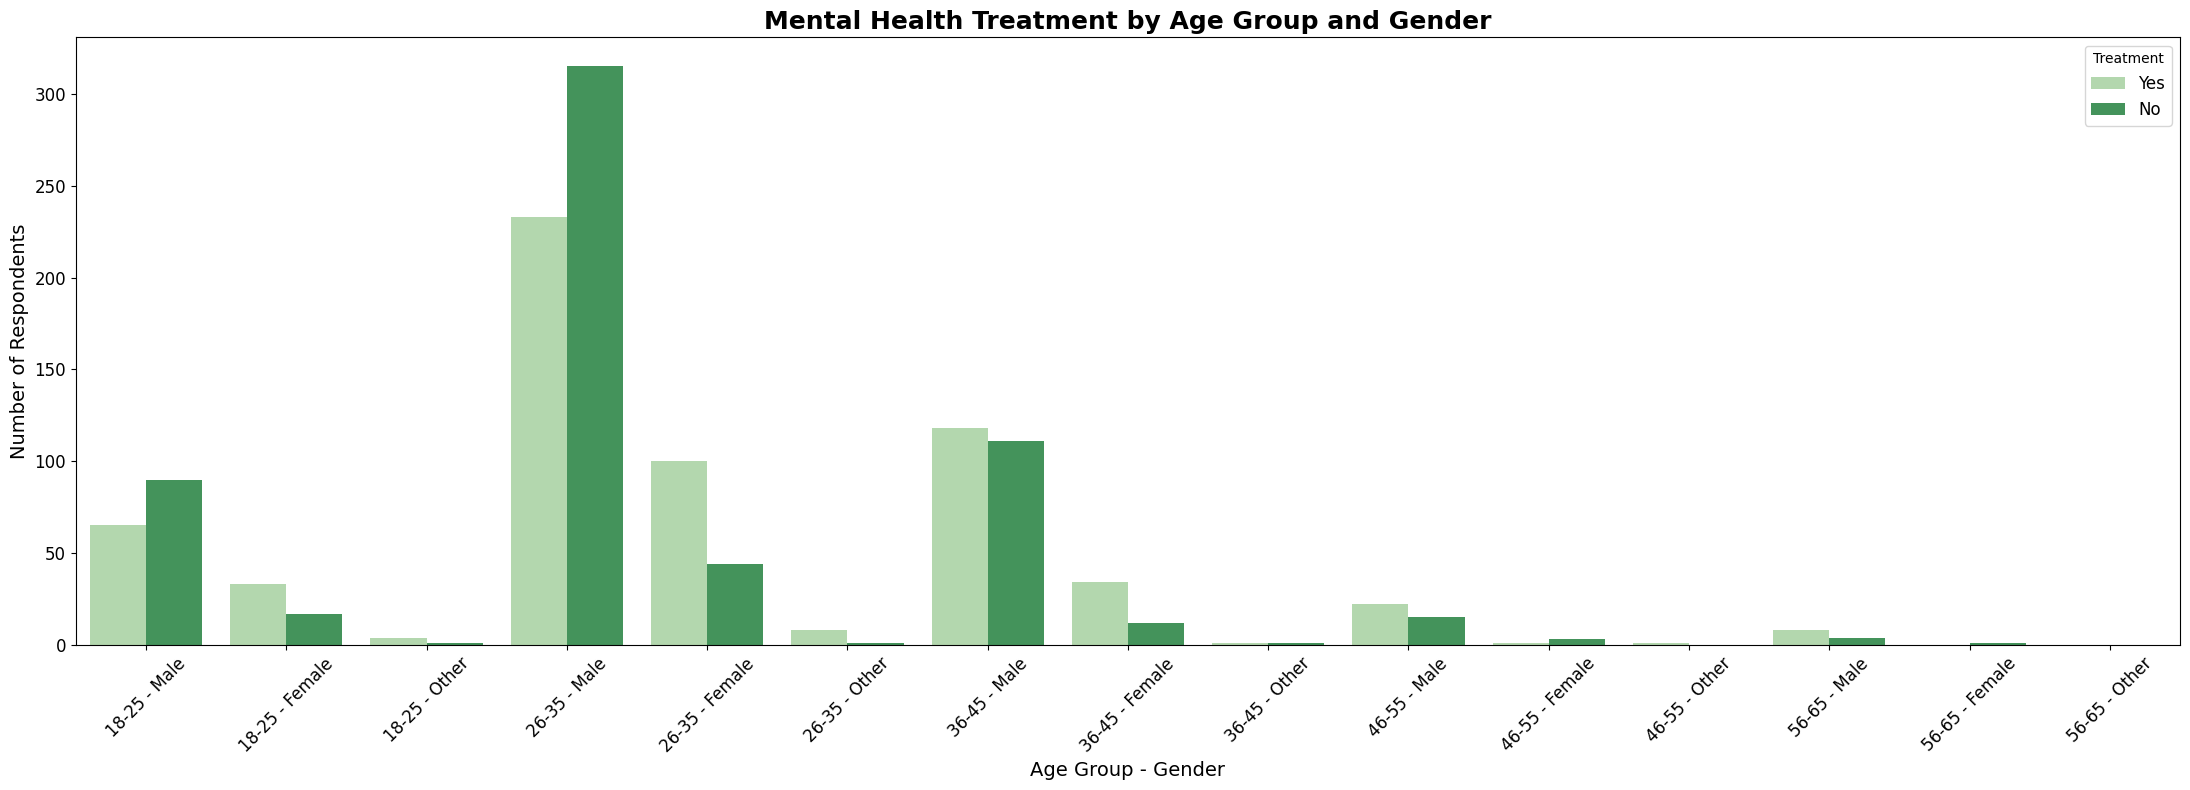

In [6]:
ds = ds[(ds['Age'] >= 18) & (ds['Age'] <= 65)]

bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
ds['age_group'] = pd.cut(ds['Age'], bins=bins, labels=labels, right=True)
ds['age_gender'] = ds['age_group'].astype(str) + ' - ' + ds['Gender']

age_order = []
for age in labels:
    for gender in ['Male', 'Female', 'Other']:
        age_order.append(f'{age} - {gender}')

plt.figure(figsize=(22, 8))
sns.countplot(x='age_gender', hue='treatment', data=ds, palette='Greens', order=age_order)

plt.title('Mental Health Treatment by Age Group and Gender', fontsize=18, fontweight='bold')
plt.xlabel('Age Group - Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
### Family History and Mental Health Treatment
#Respondents with a family history of mental illness are more likely to seek treatment than those without. Despite fewer individuals reporting a family history, they show a significantly higher treatment rate, indicating possible awareness or increased perceived need.

<ipython-input-7-44dbf5b7092d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='family_history', y='Percentage', data=eda_percentage, palette='Greens')  # use 'Greens' instead of 'Green'


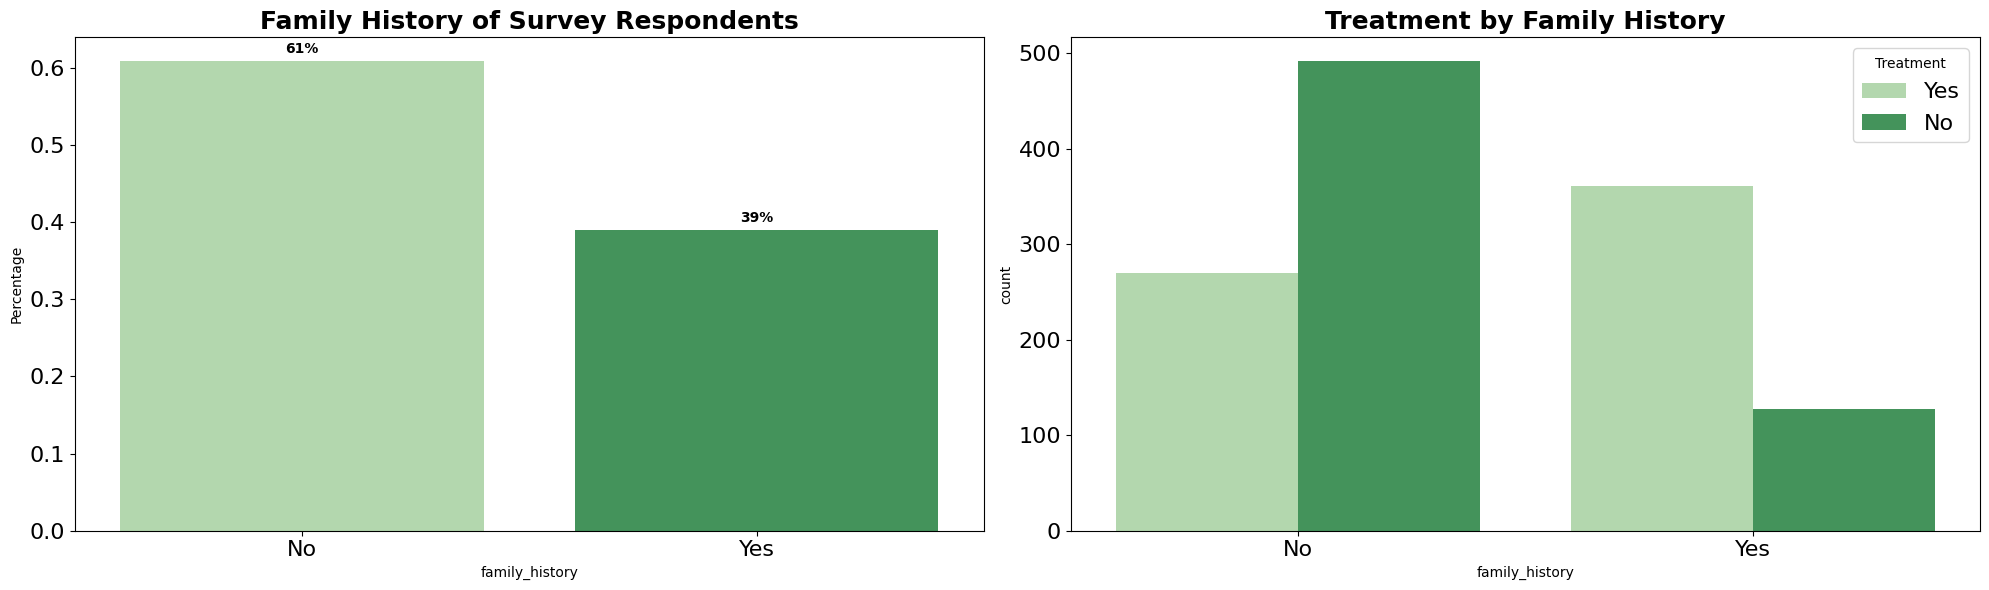

In [7]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = ds['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
ax = sns.barplot(x='family_history', y='Percentage', data=eda_percentage, palette='Greens')  # use 'Greens' instead of 'Green'

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='family_history', hue='treatment', data=ds, palette='Greens')

plt.title('Treatment by Family History', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title='Treatment')

plt.tight_layout()
plt.show()


In [ ]:
#Work Interference and Mental Health Treatment
#Most respondents reported that their mental health "sometimes" interferes with work, and this group also shows the highest rate of seeking treatment. Those who reported frequent interference ("Often") were also more likely to have pursued mental health support.


<ipython-input-8-c9d2081e4132>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Greens')


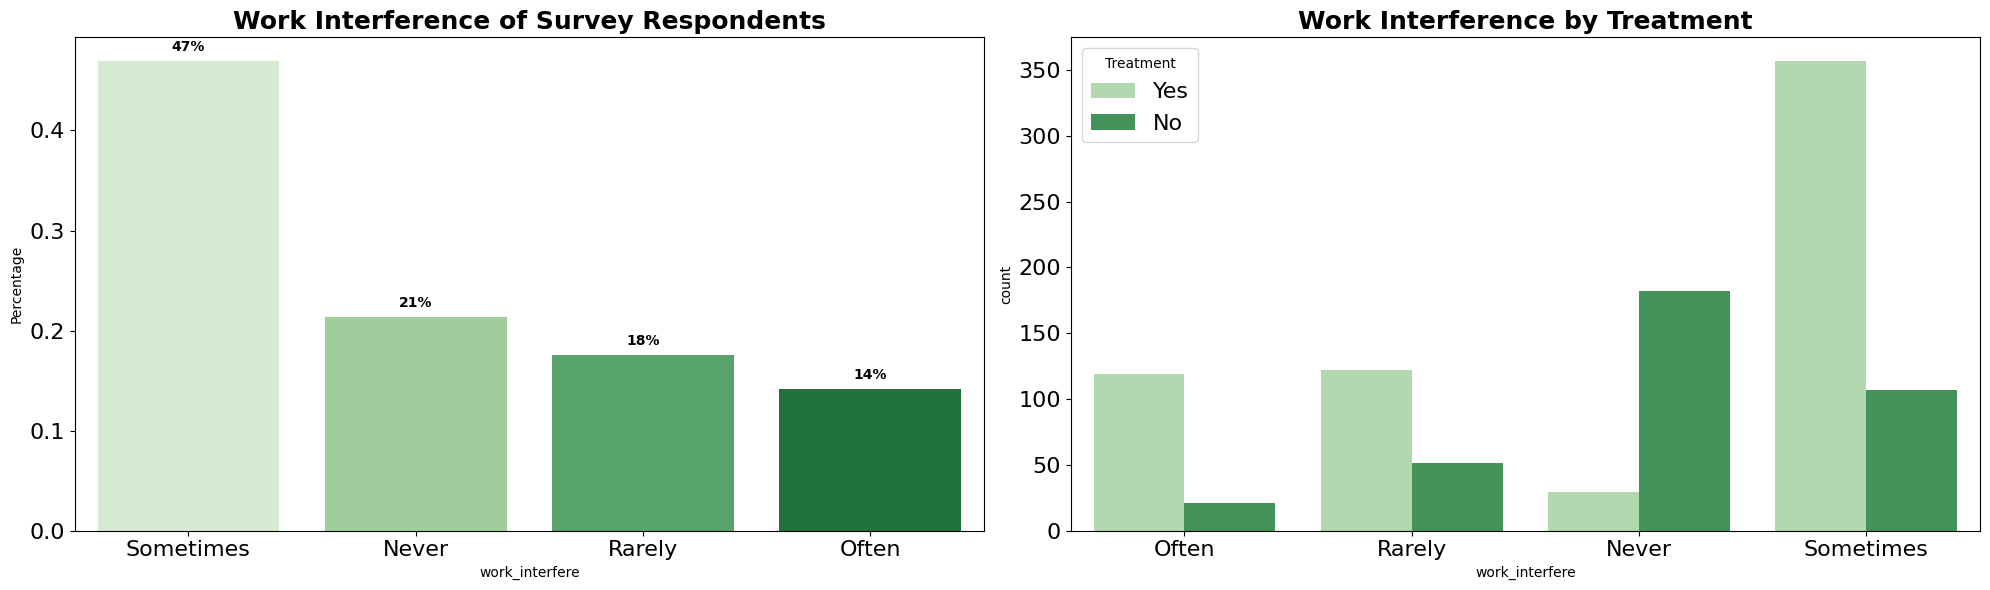

In [8]:
plt.figure(figsize=(20, 6))

# work interference distribution
plt.subplot(1, 2, 1)
eda_percentage = ds['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Greens')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Countplot with Treatment Hue
plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=ds, palette='Greens')

plt.title('Work Interference by Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title='Treatment')

plt.tight_layout()
plt.show()

In [ ]:
#Tech Company Employment & Willingness to Seek Help

#While the majority of respondents work in tech companies, most are still unwilling or unsure about seeking help for mental health issues. Interestingly, those who do seek help are more likely to have received treatment, highlighting the role of awareness and support access in influencing care-seeking behavior.


<ipython-input-9-b42cd5507ef0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='seek_help', y='Percentage', data=seek_help_percentage, palette='Greens')
<ipython-input-9-b42cd5507ef0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='tech_company', y='Percentage', data=tech_company_percentage, palette='Greens')


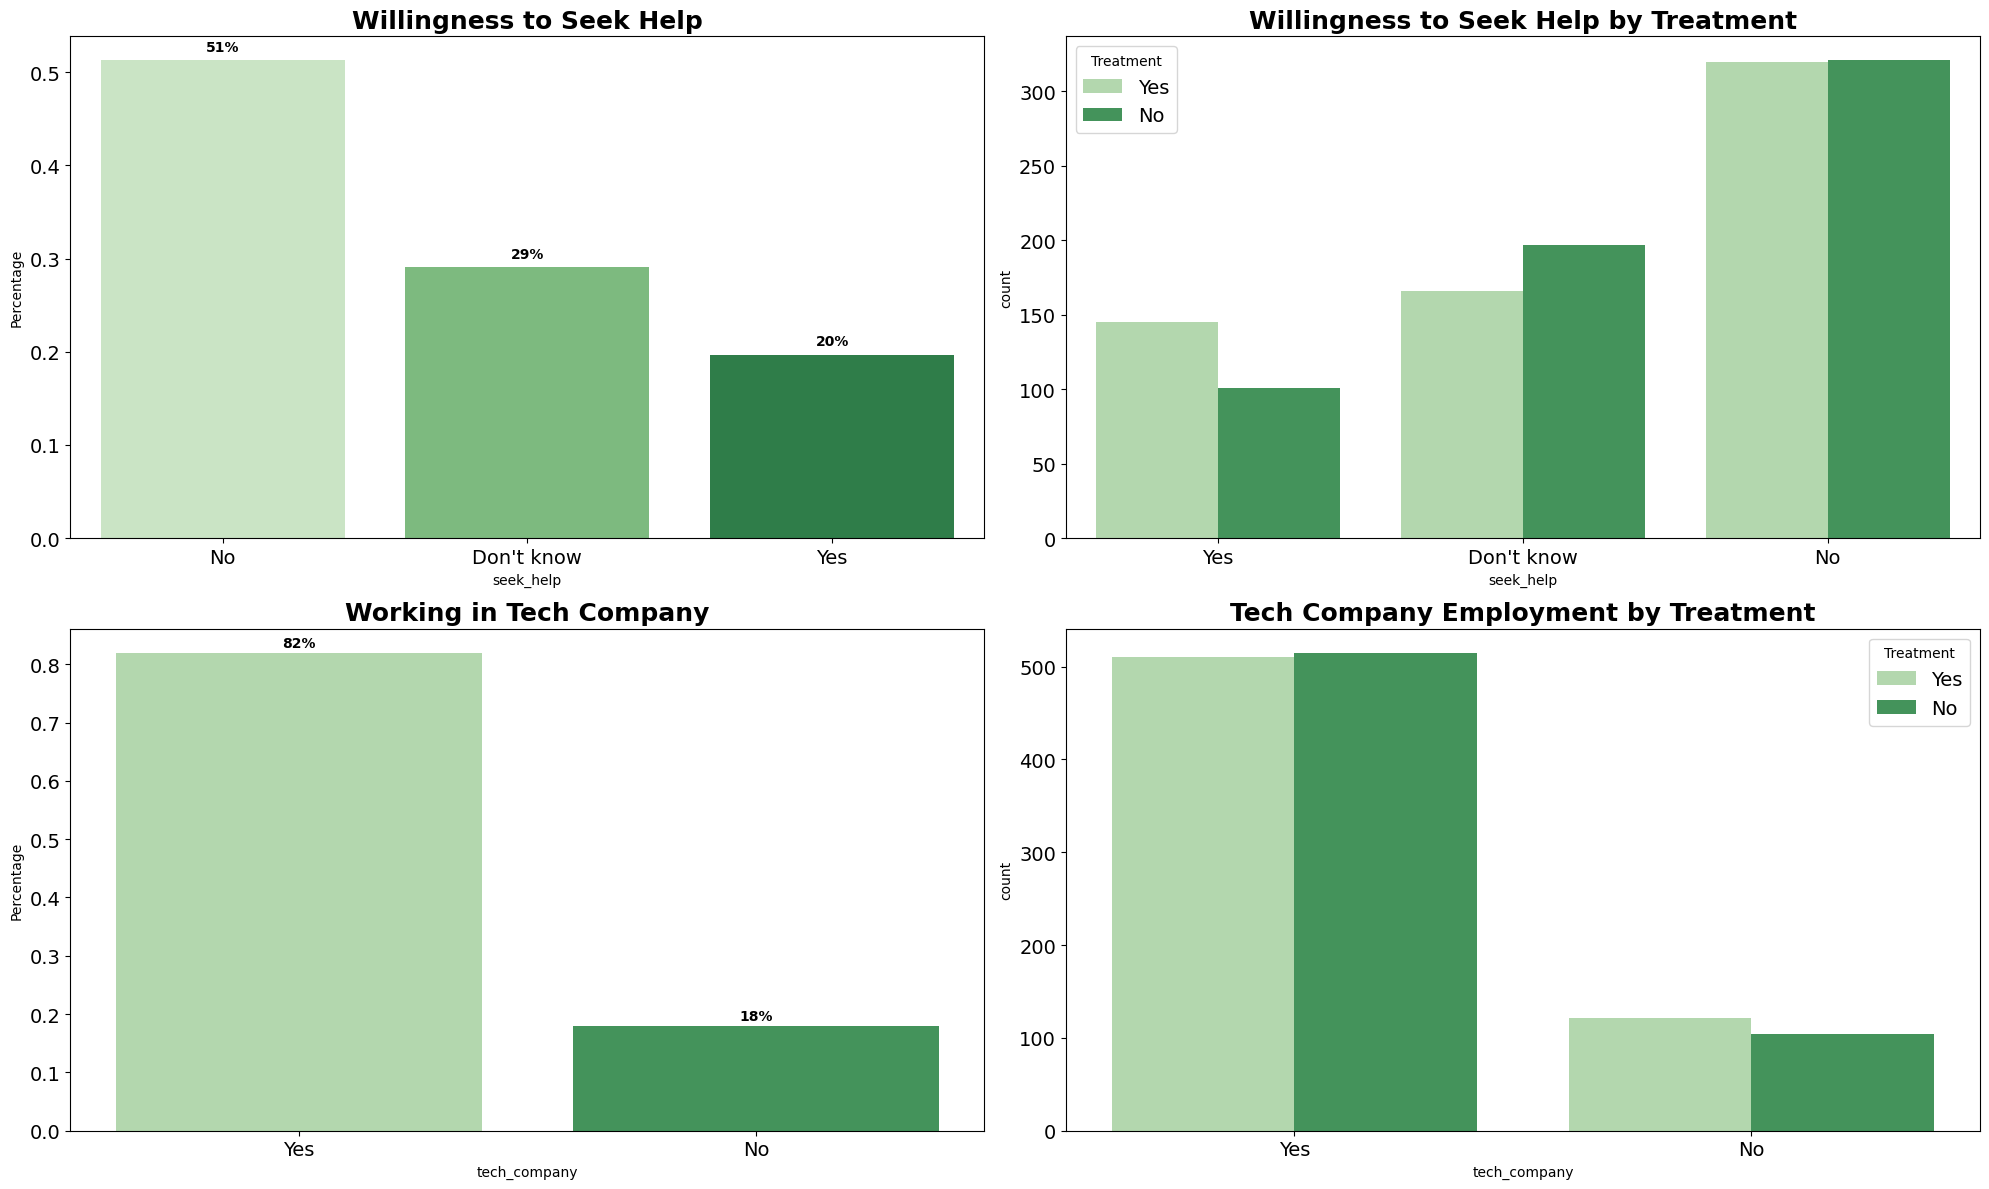

In [9]:
plt.figure(figsize=(20, 12))

# seek_help percentage
plt.subplot(2, 2, 1)
seek_help_percentage = ds['seek_help'].value_counts(normalize=True).rename_axis('seek_help').reset_index(name='Percentage')
ax1 = sns.barplot(x='seek_help', y='Percentage', data=seek_help_percentage, palette='Greens')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')

plt.title('Willingness to Seek Help', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# seek_help by treatment
plt.subplot(2, 2, 2)
sns.countplot(x='seek_help', hue='treatment', data=ds, palette='Greens')
plt.title('Willingness to Seek Help by Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title='Treatment')

# tech_company Percentage
plt.subplot(2, 2, 3)
tech_company_percentage = ds['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax2 = sns.barplot(x='tech_company', y='Percentage', data=tech_company_percentage, palette='Greens')
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')

plt.title('Working in Tech Company', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# tech_company by treatment
plt.subplot(2, 2, 4)
sns.countplot(x='tech_company', hue='treatment', data=ds, palette='Greens')
plt.title('Tech Company Employment by Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title='Treatment')

plt.tight_layout()
plt.show()


In [ ]:
# Remote Work, Consequences, and Leave Policies
#Most respondents do not work remotely and believe that disclosing mental health issues may not lead to negative consequences, although uncertainty remains high. Additionally, many are unsure about the ease of taking mental health leave, indicating a need for clearer communication of workplace policies and support systems.


<ipython-input-10-5beec45660fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='remote_work', y='Percentage', data=remote_pct, palette='Greens')
<ipython-input-10-5beec45660fc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='mental_health_consequence', y='Percentage', data=mhc_pct, palette='Greens')
<ipython-input-10-5beec45660fc>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='leave', y='Percentage', data=leave_pct, palette='Greens')


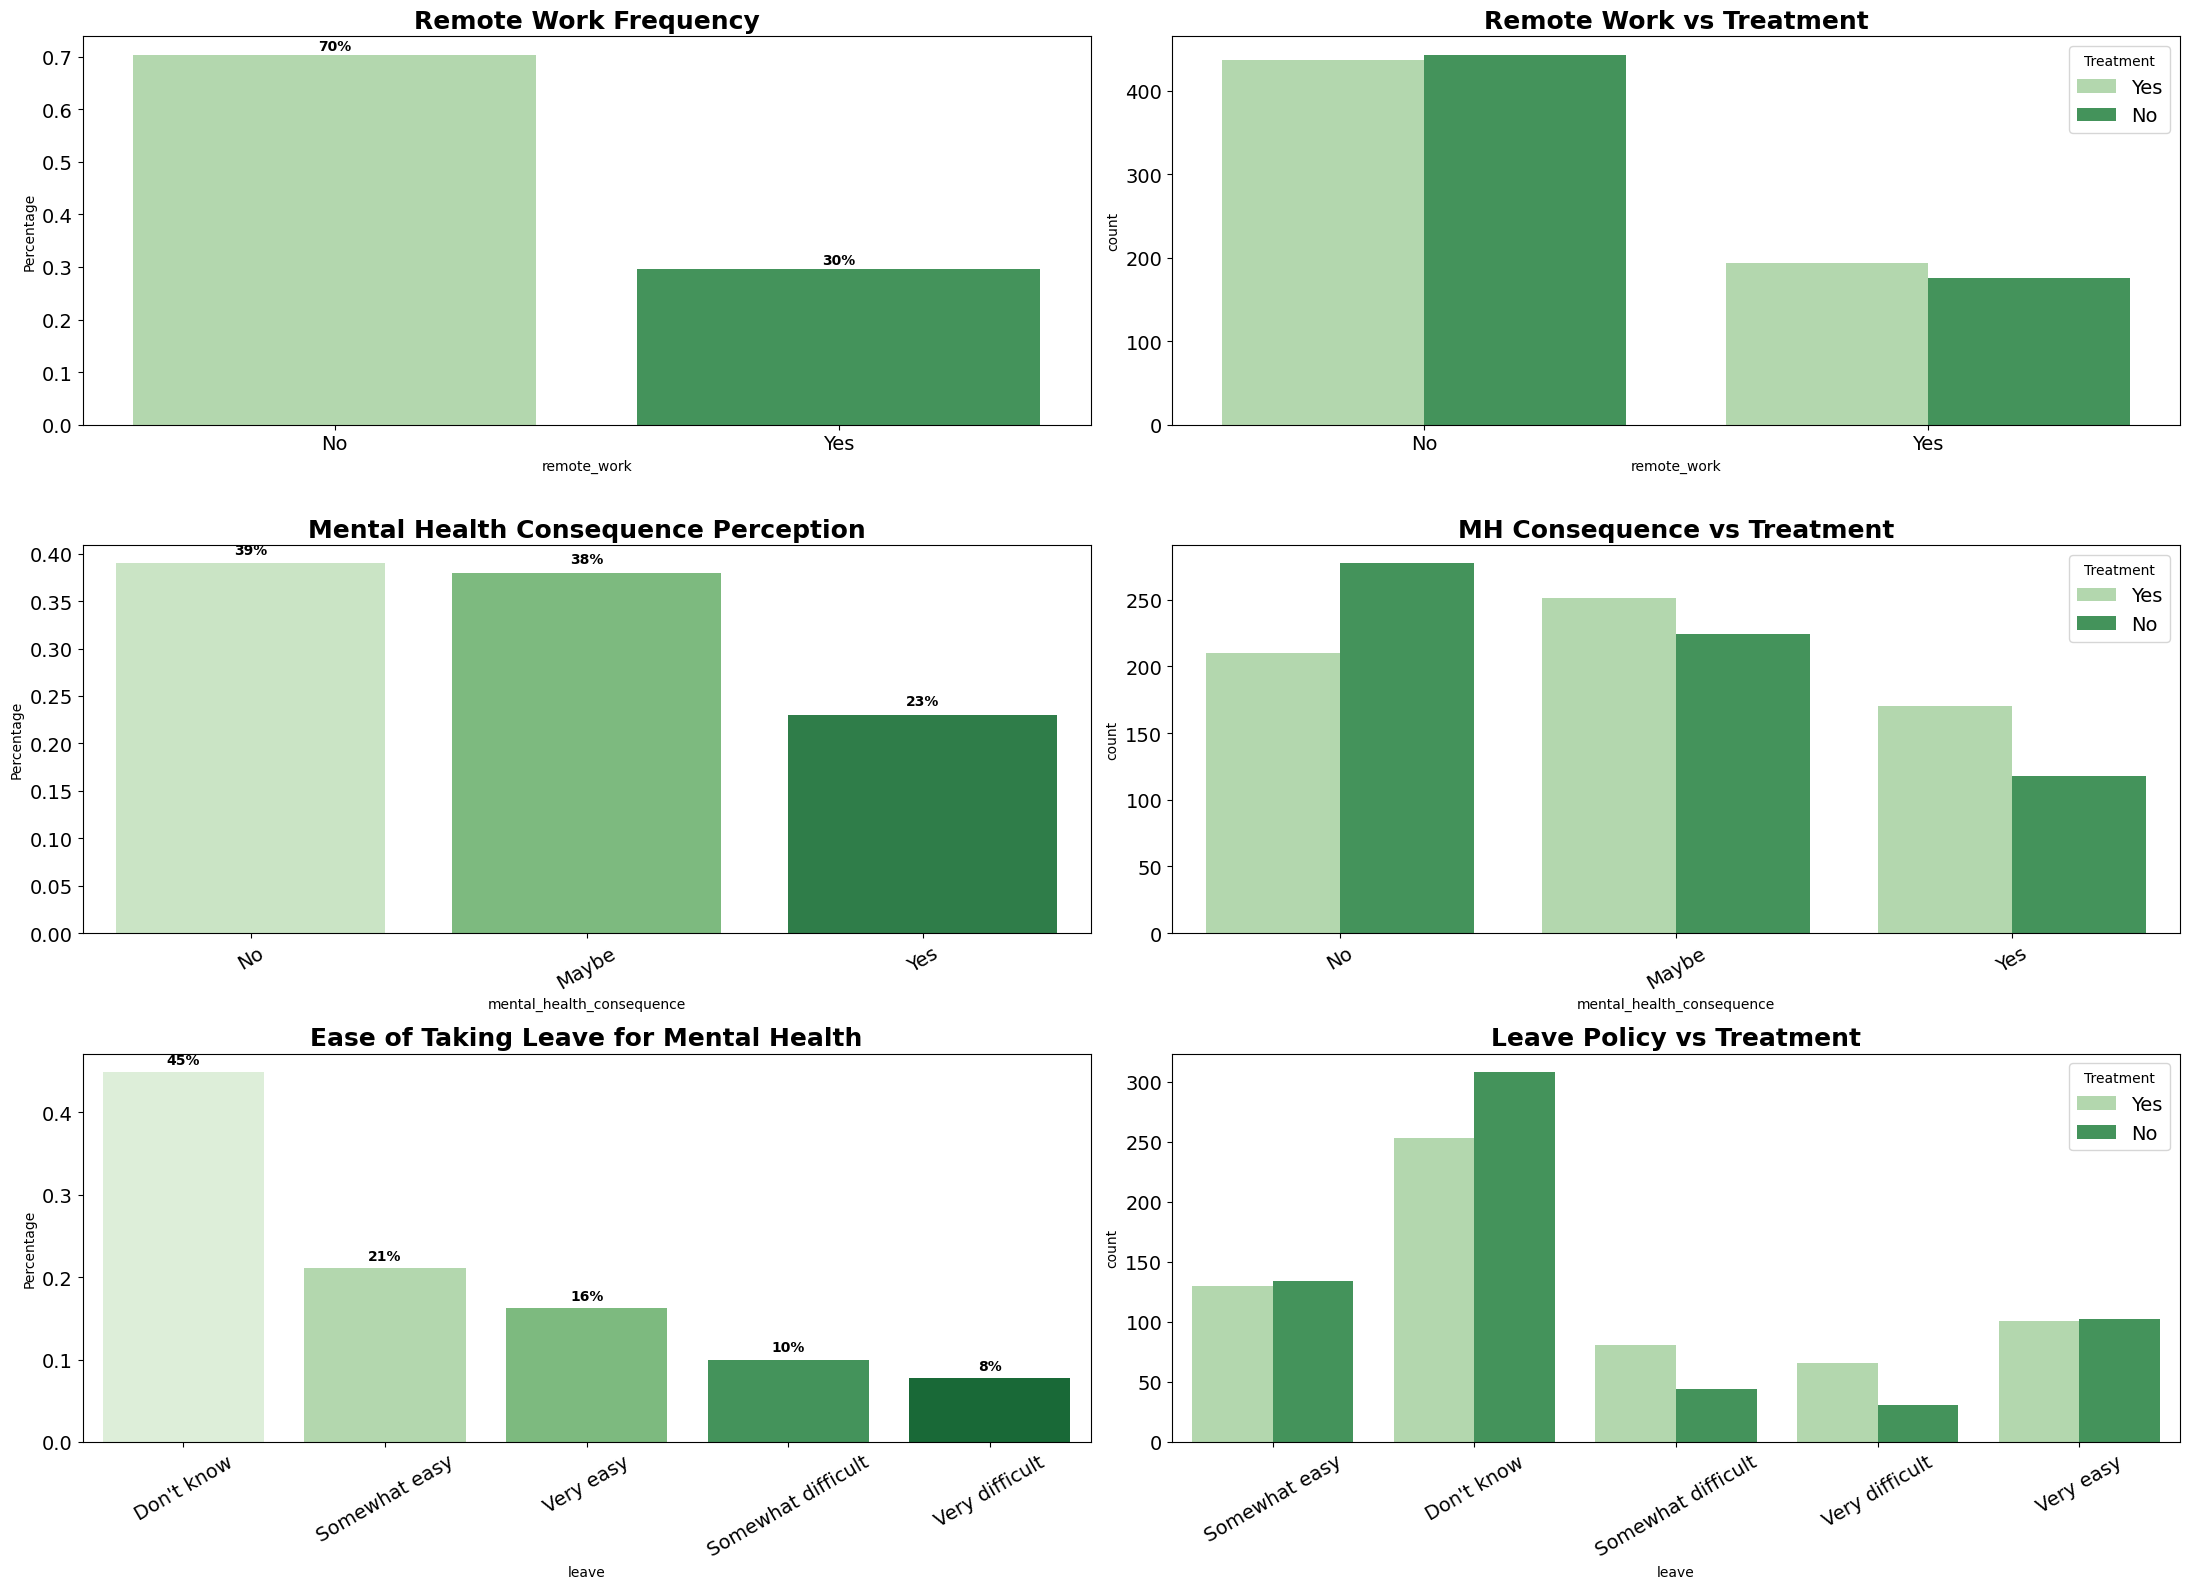

In [10]:
plt.figure(figsize=(22, 16))

# remote_work percentage
plt.subplot(3, 2, 1)
remote_pct = ds['remote_work'].value_counts(normalize=True).rename_axis('remote_work').reset_index(name='Percentage')
ax1 = sns.barplot(x='remote_work', y='Percentage', data=remote_pct, palette='Greens')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')
plt.title('Remote Work Frequency', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# remote_work by treatment
plt.subplot(3, 2, 2)
sns.countplot(x='remote_work', hue='treatment', data=ds, palette='Greens')
plt.title('Remote Work vs Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)

# mental_health_consequence percentage
plt.subplot(3, 2, 3)
mhc_pct = ds['mental_health_consequence'].value_counts(normalize=True).rename_axis('mental_health_consequence').reset_index(name='Percentage')
ax2 = sns.barplot(x='mental_health_consequence', y='Percentage', data=mhc_pct, palette='Greens')
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')
plt.title('Mental Health Consequence Perception', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)

# mental_health_consequence by treatment
plt.subplot(3, 2, 4)
sns.countplot(x='mental_health_consequence', hue='treatment', data=ds, palette='Greens')
plt.title('MH Consequence vs Treatment', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)

# leave Percentage
plt.subplot(3, 2, 5)
leave_pct = ds['leave'].value_counts(normalize=True).rename_axis('leave').reset_index(name='Percentage')
ax3 = sns.barplot(x='leave', y='Percentage', data=leave_pct, palette='Greens')
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')
plt.title('Ease of Taking Leave for Mental Health', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)

# leave by treatment
plt.subplot(3, 2, 6)
sns.countplot(x='leave', hue='treatment', data=ds, palette='Greens')
plt.title('Leave Policy vs Treatment', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
#Tech Companies, Wellness Programs, and Mental Health Support
#Although most respondents work in tech companies, a majority report that their employers do not offer wellness programs or mental health help-seeking resources. Interestingly, those who are aware of such programs or are willing to seek help are more likely to have received treatment, suggesting that employer support plays a role in encouraging mental health care.


<ipython-input-11-65cca82eaa66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='tech_company', y='Percentage', data=tech_pct, palette='Greens')
<ipython-input-11-65cca82eaa66>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='wellness_program', y='Percentage', data=wellness_pct, palette='Greens')
<ipython-input-11-65cca82eaa66>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='seek_help', y='Percentage', data=seek_pct, palette='Greens')


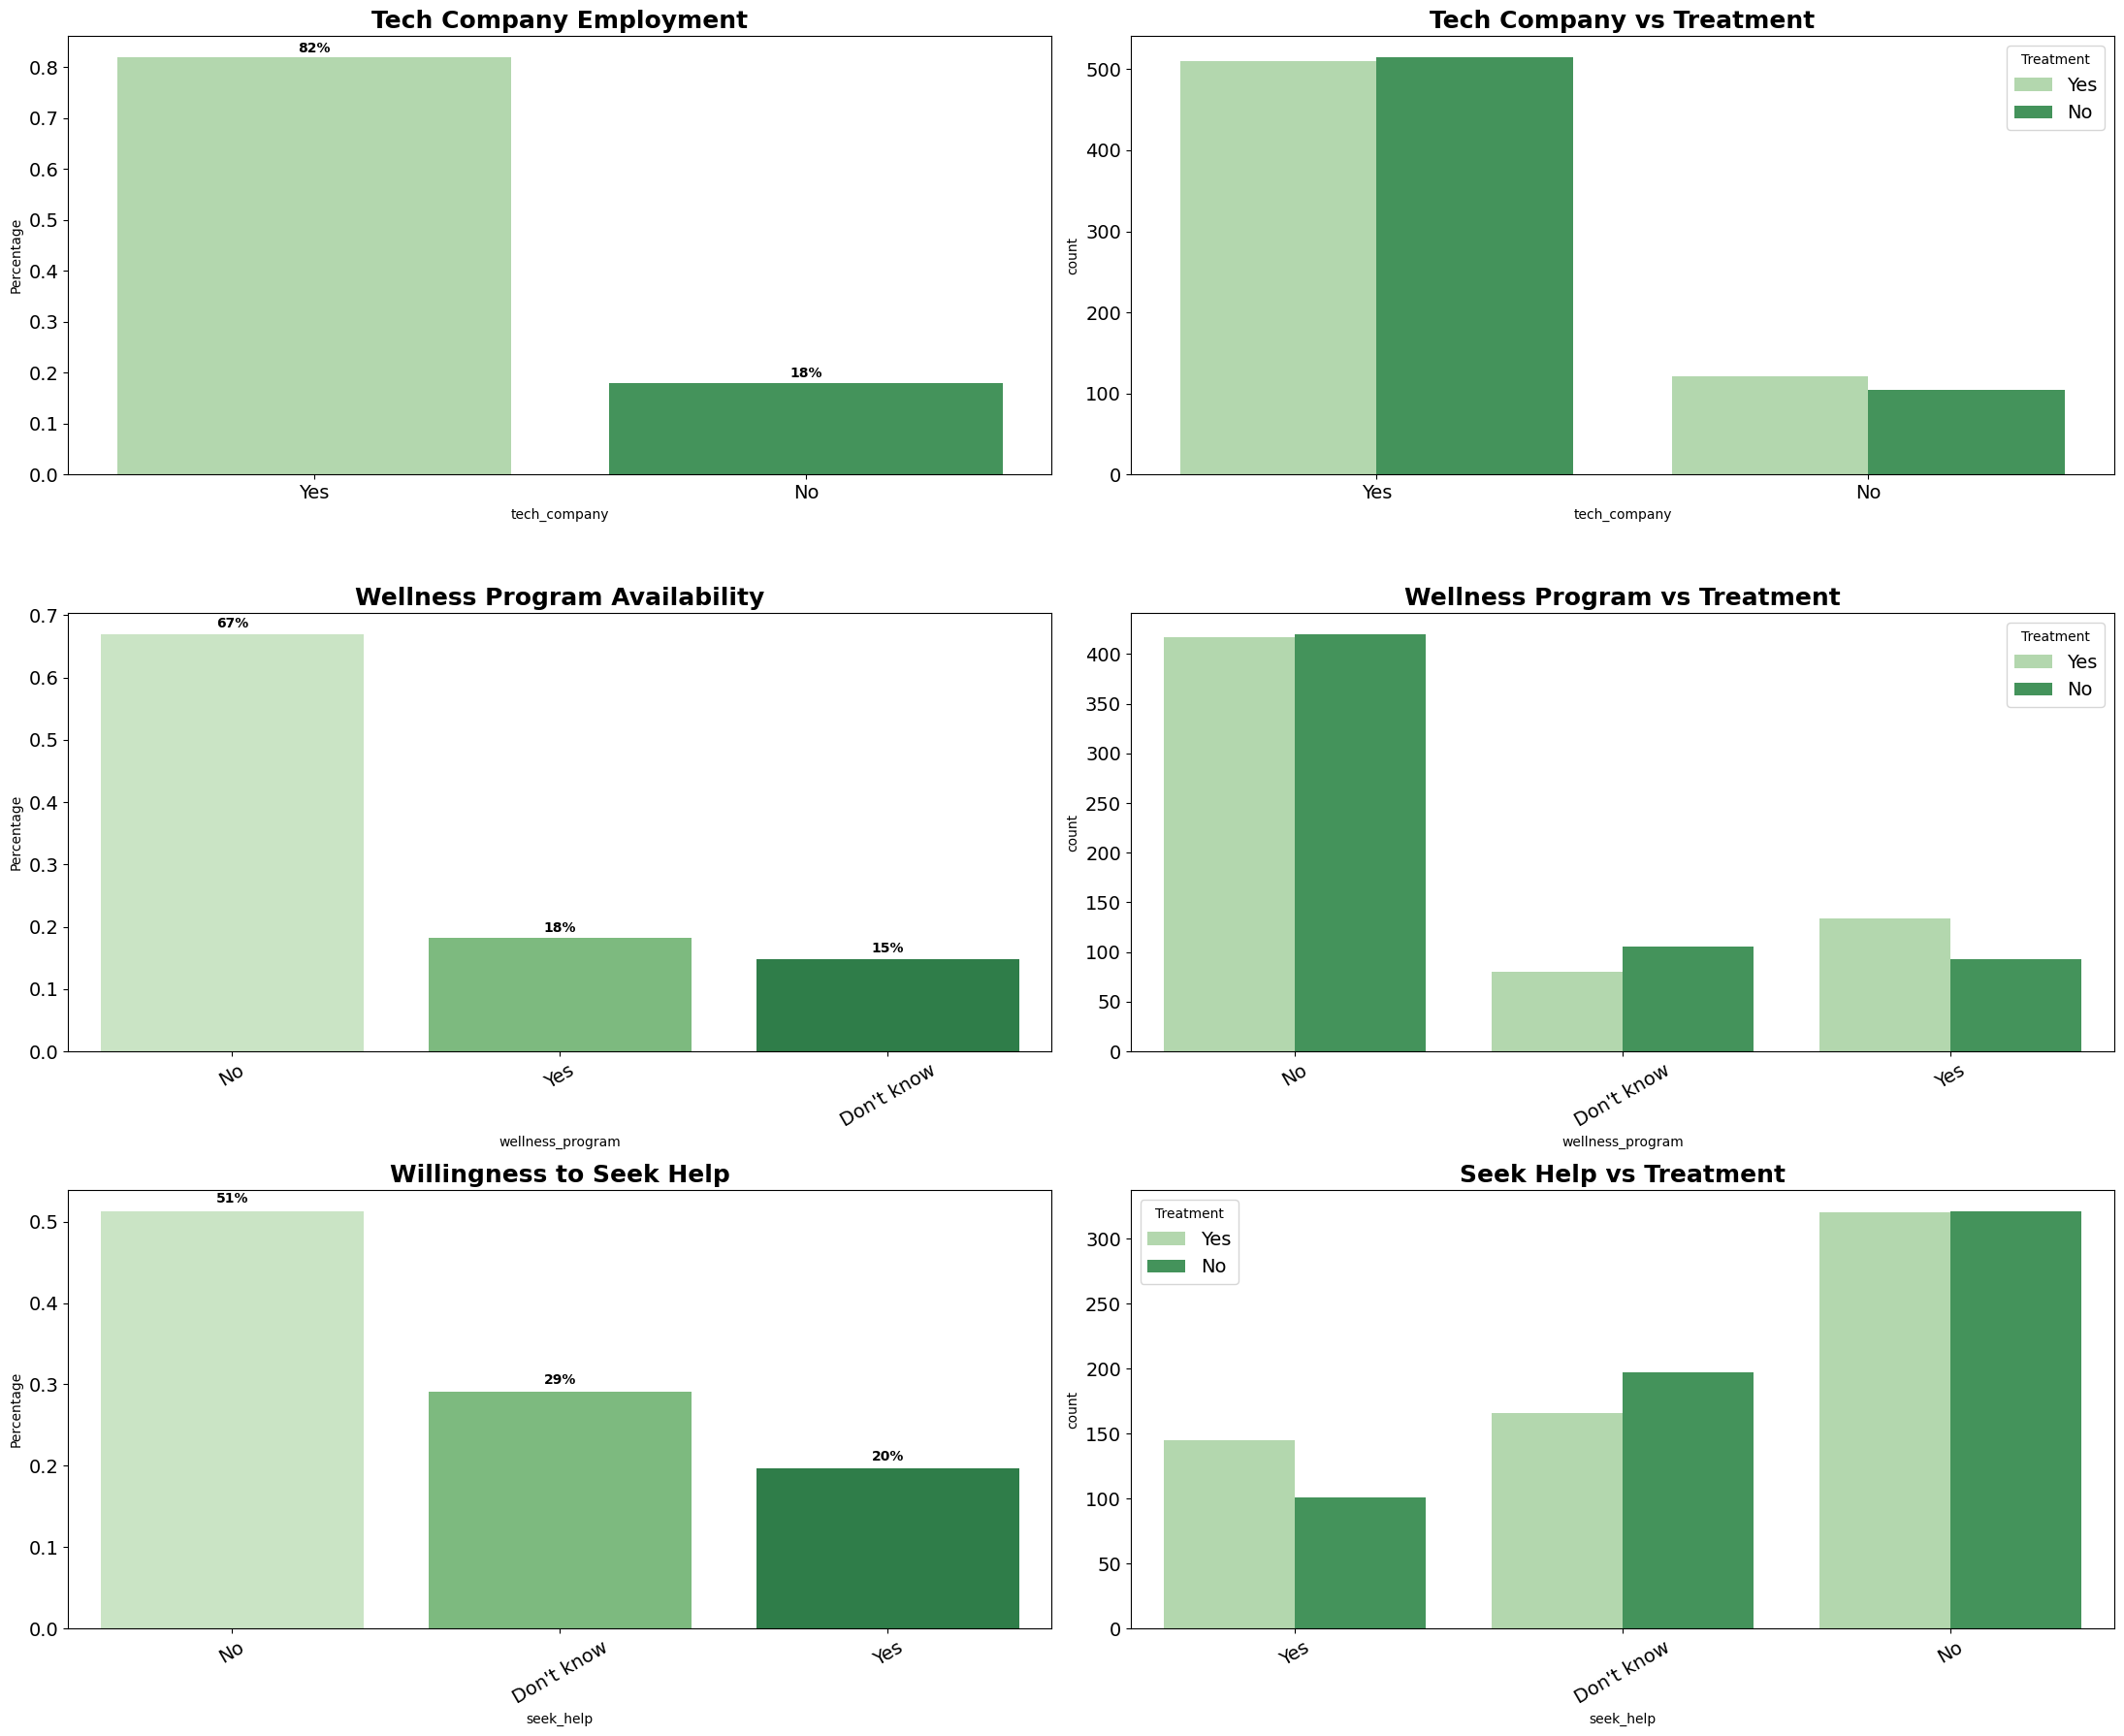

In [11]:
plt.figure(figsize=(22, 18))

# tech_company Percentage
plt.subplot(3, 2, 1)
tech_pct = ds['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax1 = sns.barplot(x='tech_company', y='Percentage', data=tech_pct, palette='Greens')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')
plt.title('Tech Company Employment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# tech_company by treatment
plt.subplot(3, 2, 2)
sns.countplot(x='tech_company', hue='treatment', data=ds, palette='Greens')
plt.title('Tech Company vs Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)

# wellness_program Percentage
plt.subplot(3, 2, 3)
wellness_pct = ds['wellness_program'].value_counts(normalize=True).rename_axis('wellness_program').reset_index(name='Percentage')
ax2 = sns.barplot(x='wellness_program', y='Percentage', data=wellness_pct, palette='Greens')
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')
plt.title('Wellness Program Availability', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)

# wellness_program by treatment
plt.subplot(3, 2, 4)
sns.countplot(x='wellness_program', hue='treatment', data=ds, palette='Greens')
plt.title('Wellness Program vs Treatment', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)

# seek_help Percentage
plt.subplot(3, 2, 5)
seek_pct = ds['seek_help'].value_counts(normalize=True).rename_axis('seek_help').reset_index(name='Percentage')
ax3 = sns.barplot(x='seek_help', y='Percentage', data=seek_pct, palette='Greens')
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2, height + 0.01), ha='center', fontweight='bold')
plt.title('Willingness to Seek Help', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)

# seek_help by treatment
plt.subplot(3, 2, 6)
sns.countplot(x='seek_help', hue='treatment', data=ds, palette='Greens')
plt.title('Seek Help vs Treatment', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
#Perceived Consequences of Mental vs Physical Health Disclosure
#Respondents are far more concerned about the consequences of disclosing mental health conditions than physical ones, especially in job interviews. This fear is reinforced by observed negative outcomes in the workplace, highlighting a persistent stigma around mental health.


<ipython-input-14-6f8b077ed886>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mental_health_consequence', data=ds, palette='Greens')
<ipython-input-14-6f8b077ed886>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phys_health_consequence', data=ds, palette='Greens')


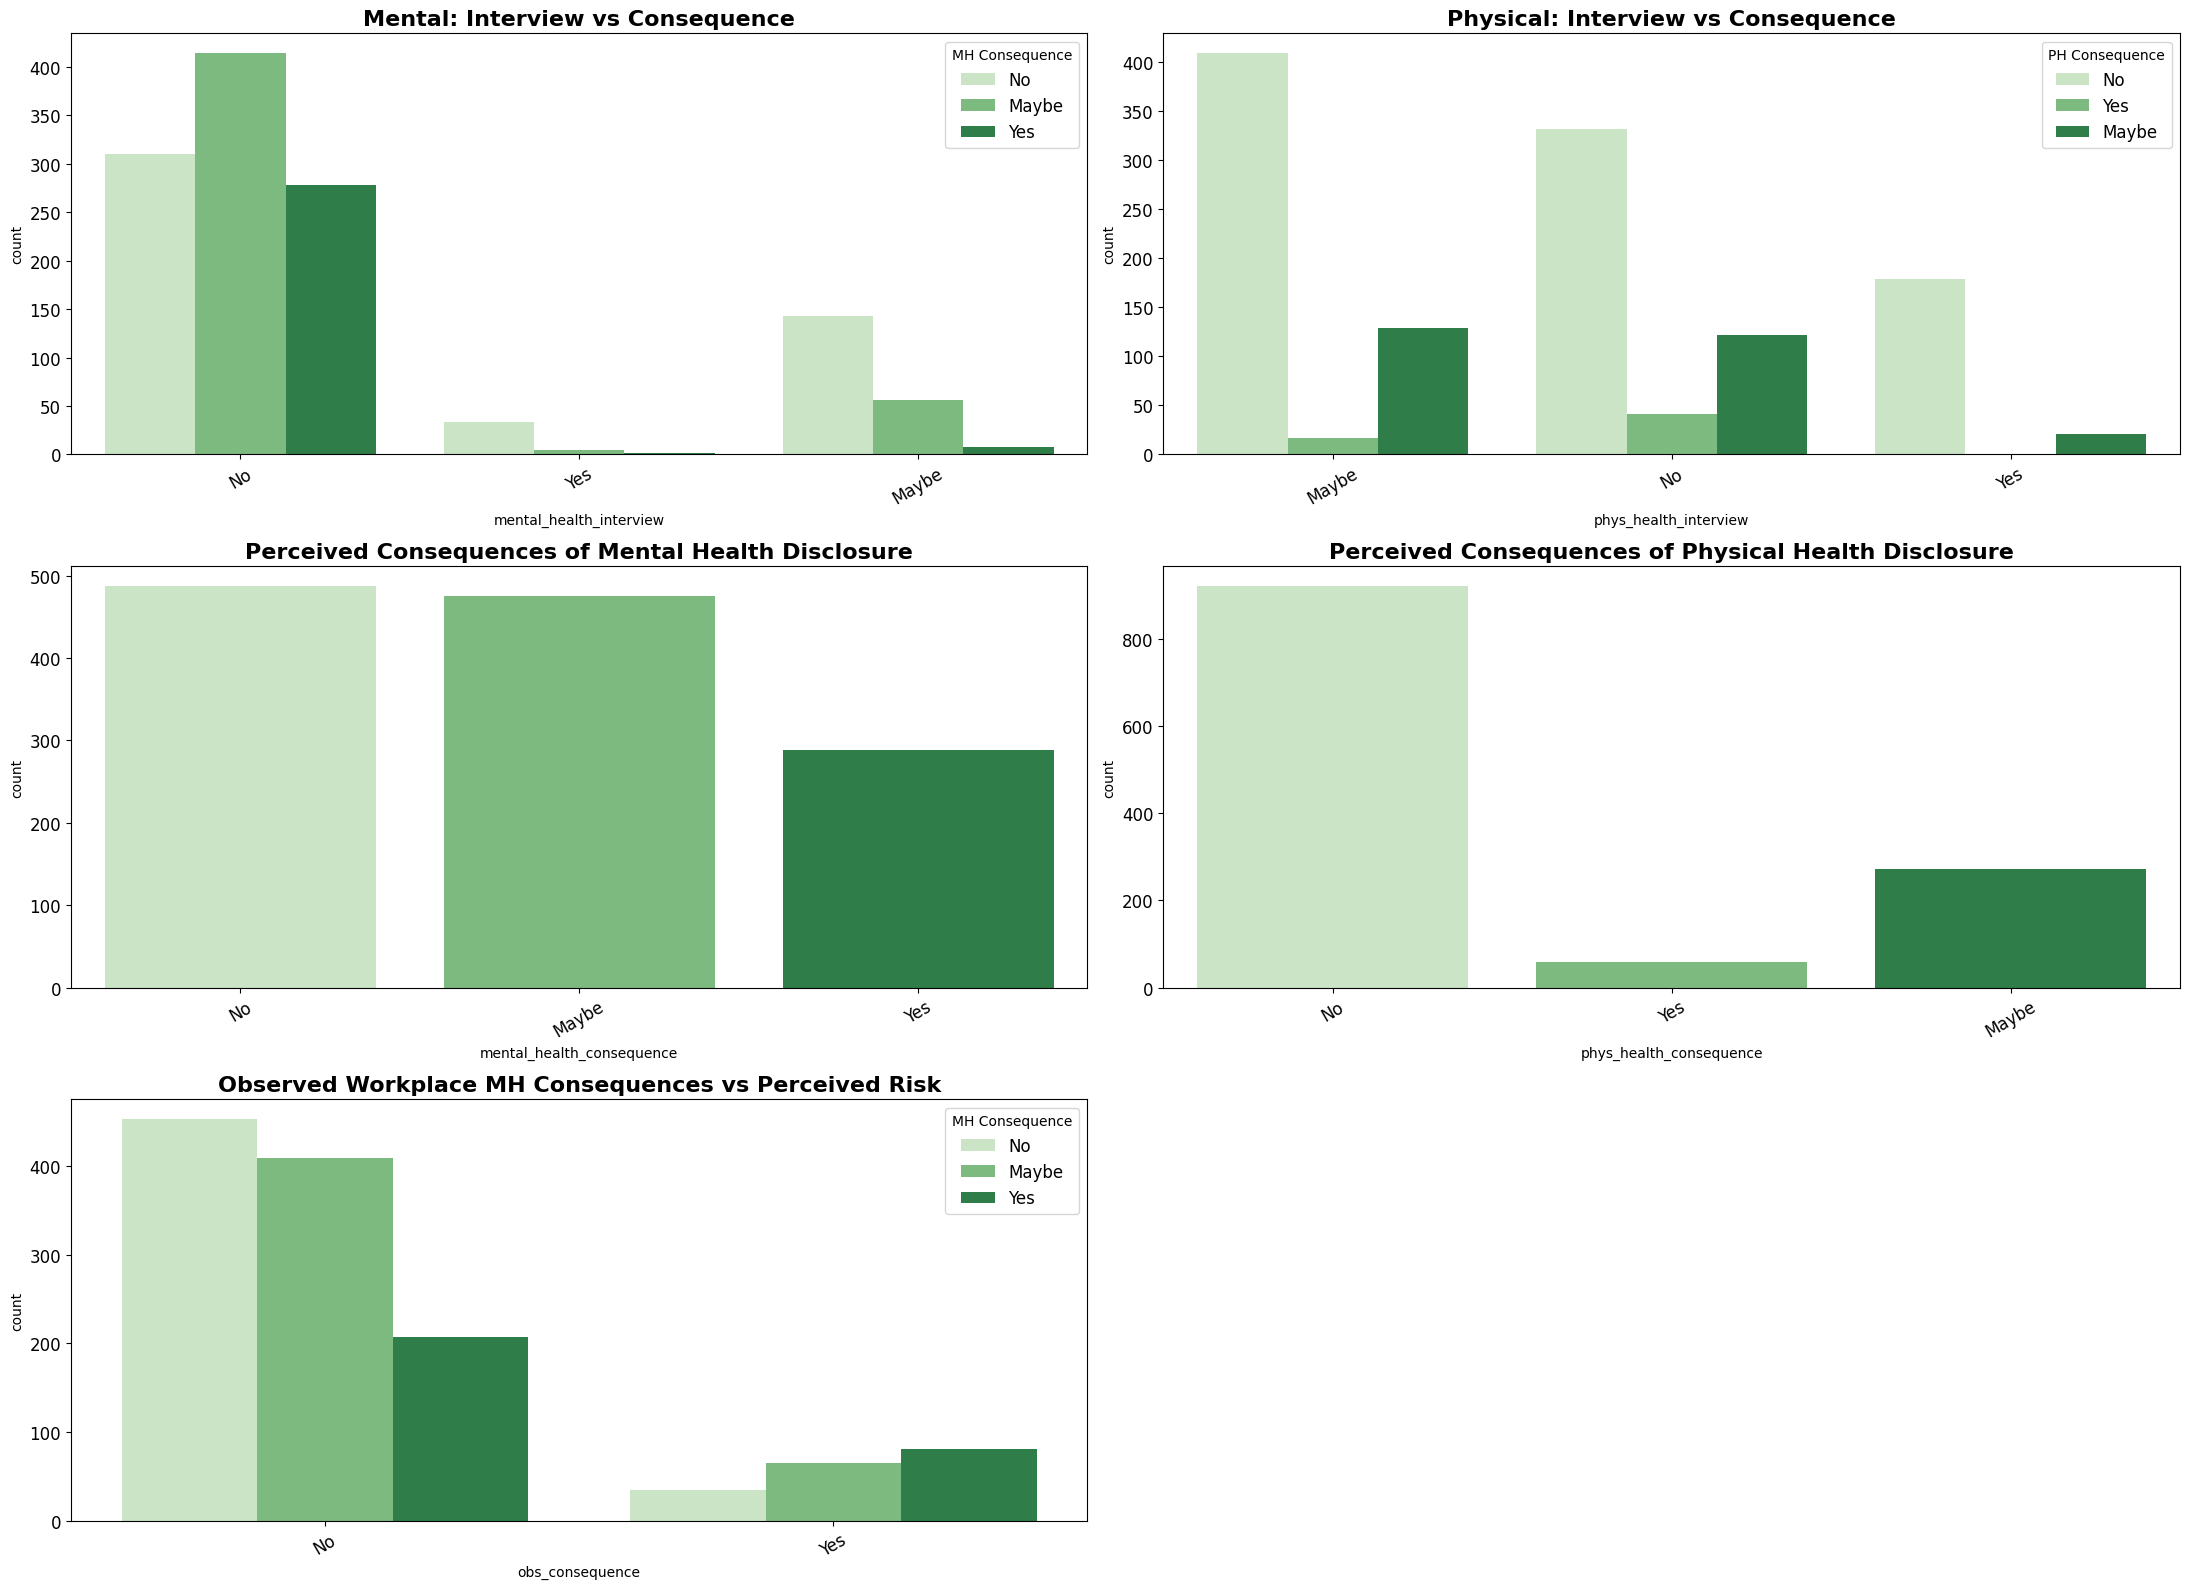

In [14]:
plt.figure(figsize=(22, 16))

# interview vs consequence
plt.subplot(3, 2, 1)
sns.countplot(x='mental_health_interview', hue='mental_health_consequence', data=ds, palette='Greens')
plt.title('Mental: Interview vs Consequence', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MH Consequence', fontsize=12)

# physical: interview vs consequence
plt.subplot(3, 2, 2)
sns.countplot(x='phys_health_interview', hue='phys_health_consequence', data=ds, palette='Greens')
plt.title('Physical: Interview vs Consequence', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='PH Consequence', fontsize=12)

# mental_health_consequence distribution
plt.subplot(3, 2, 3)
sns.countplot(x='mental_health_consequence', data=ds, palette='Greens')
plt.title('Perceived Consequences of Mental Health Disclosure', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

# phys_health_consequence distribution
plt.subplot(3, 2, 4)
sns.countplot(x='phys_health_consequence', data=ds, palette='Greens')
plt.title('Perceived Consequences of Physical Health Disclosure', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

# obs_consequence vs mental_health_consequence
plt.subplot(3, 2, 5)
sns.countplot(x='obs_consequence', hue='mental_health_consequence', data=ds, palette='Greens')
plt.title('Observed Workplace MH Consequences vs Perceived Risk', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MH Consequence', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
#Tech Companies and Mental Health Support Features
#Employees in tech companies are more likely to report access to mental health resources, benefits, and care options compared to those in non-tech firms. However, even in tech environments, uncertainty and lack of awareness remain high, which may limit the effectiveness of available support.


<ipython-input-15-2add670c837f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['seek_treat_combo'] = ds['seek_help'].astype(str) + ' / ' + ds['treatment'].astype(str)


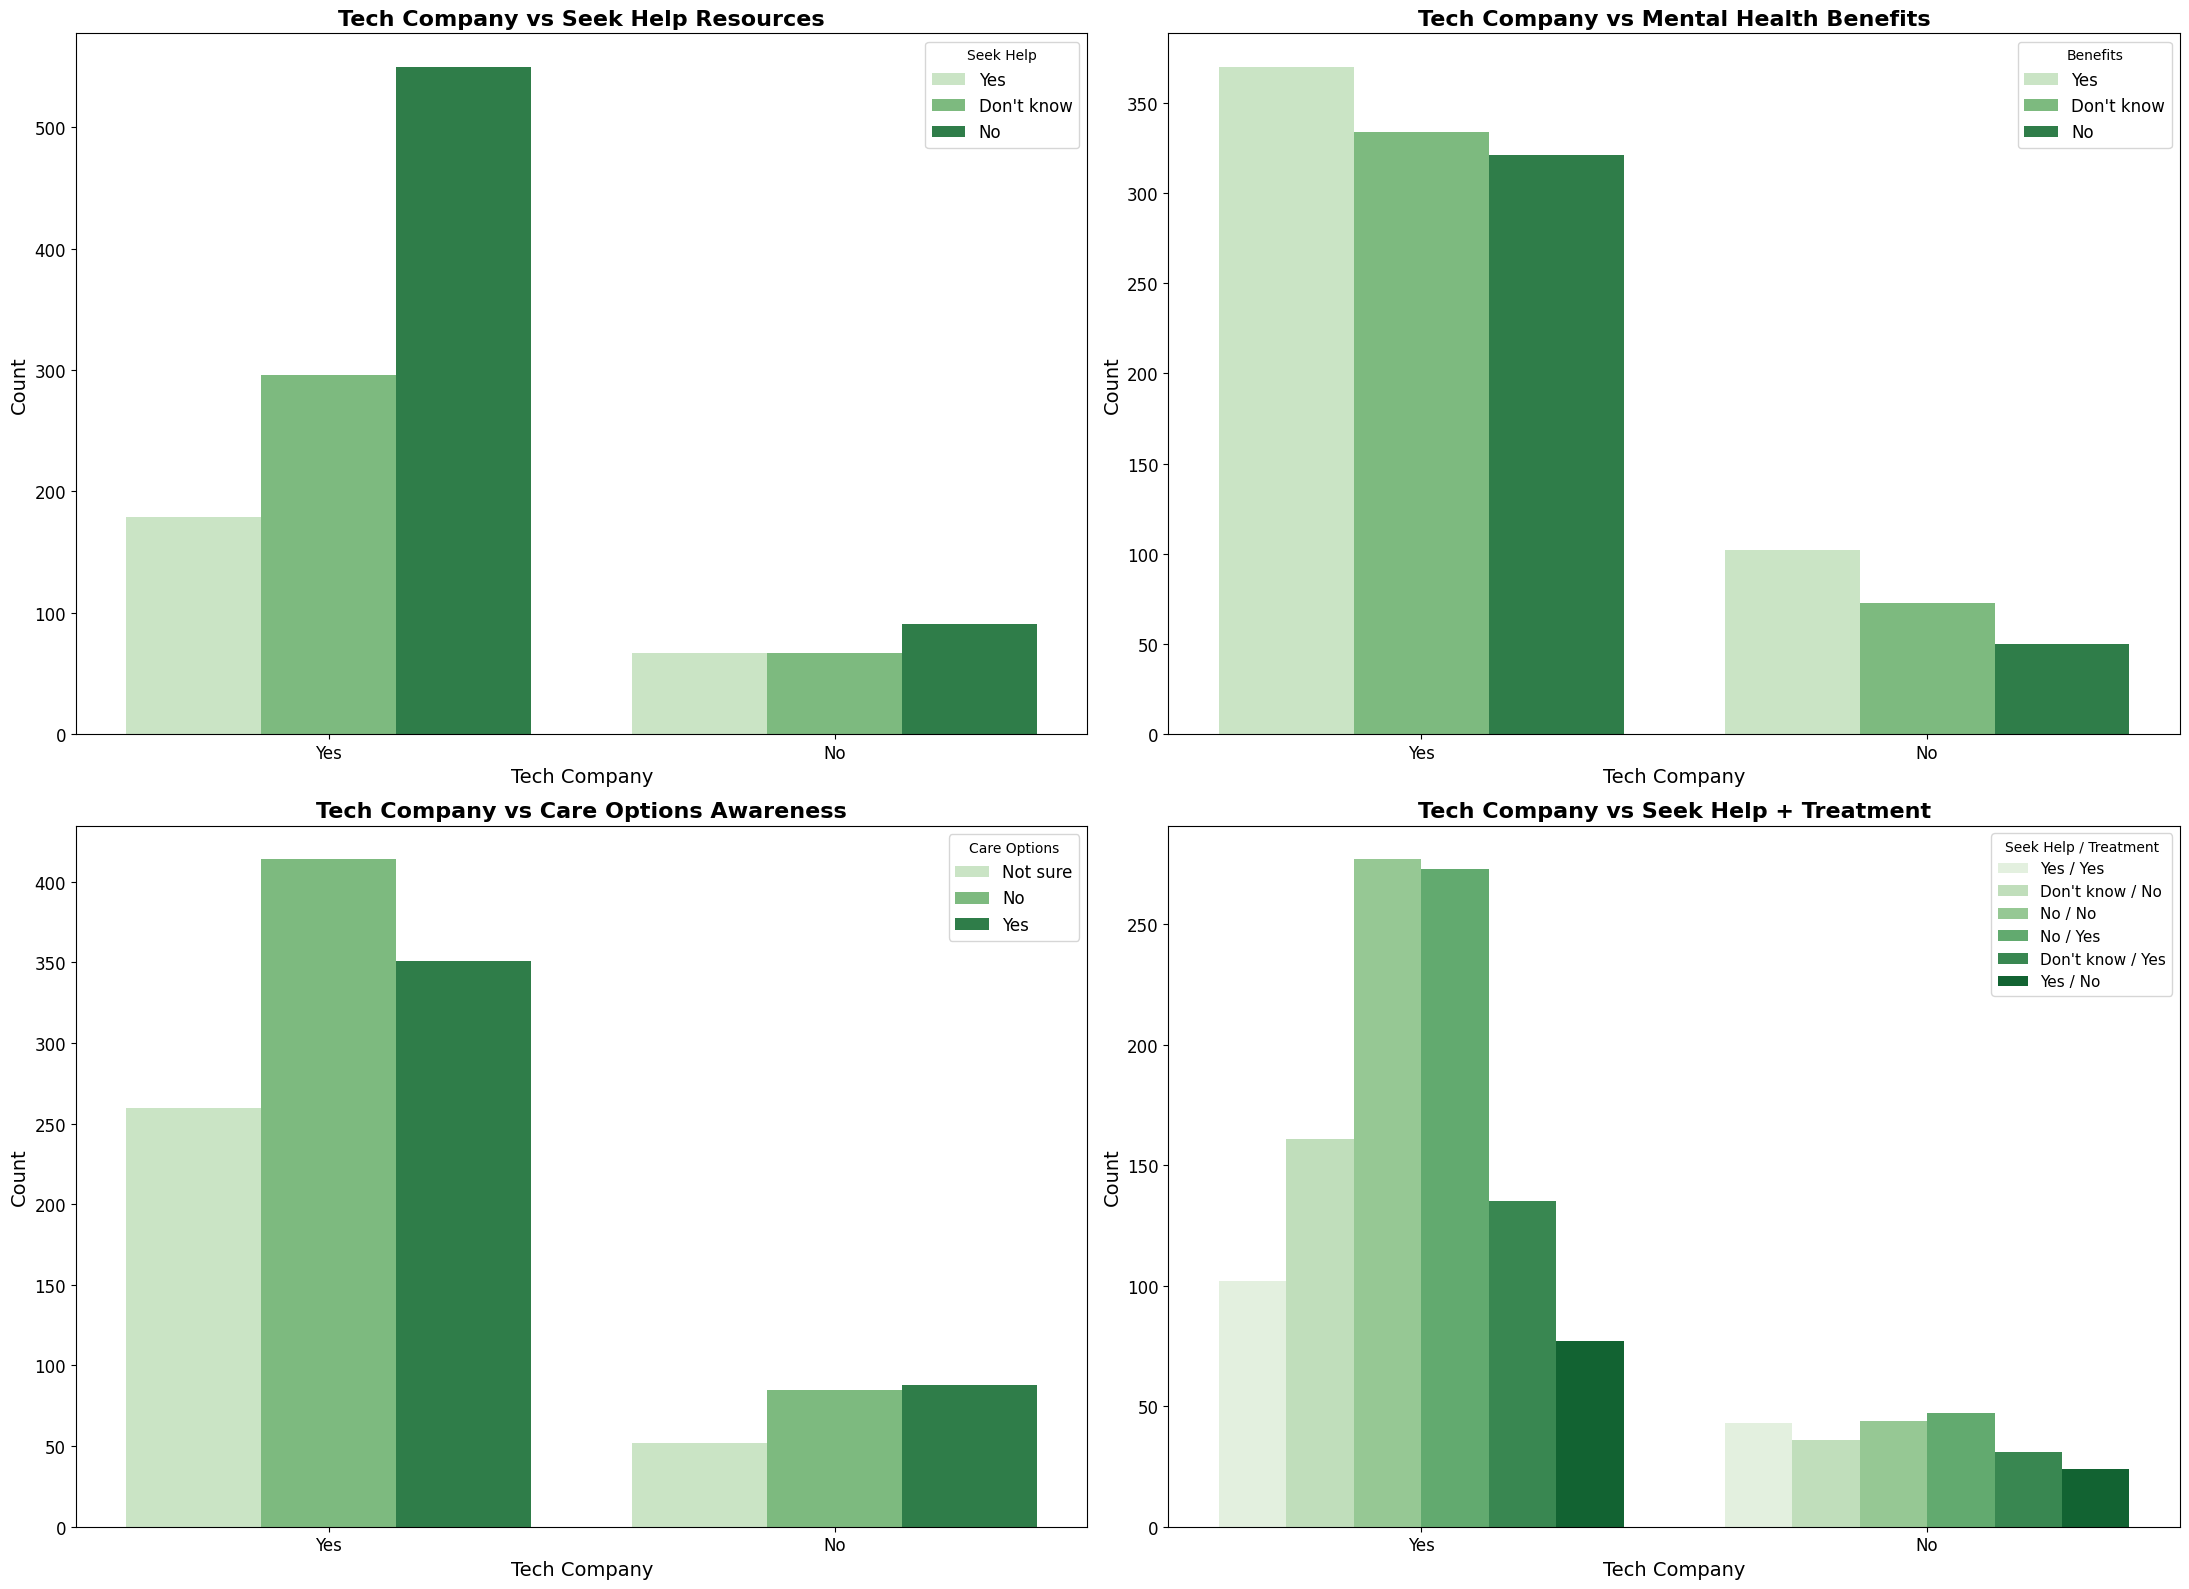

In [15]:
plt.figure(figsize=(22, 16))

# tech_company vs seek_help
plt.subplot(2, 2, 1)
sns.countplot(x='tech_company', hue='seek_help', data=ds, palette='Greens')
plt.title('Tech Company vs Seek Help Resources', fontsize=16, fontweight='bold')
plt.xlabel('Tech Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Seek Help', fontsize=12)

# tech_company vs benefits
plt.subplot(2, 2, 2)
sns.countplot(x='tech_company', hue='benefits', data=ds, palette='Greens')
plt.title('Tech Company vs Mental Health Benefits', fontsize=16, fontweight='bold')
plt.xlabel('Tech Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Benefits', fontsize=12)

# tech_company vs care_options
plt.subplot(2, 2, 3)
sns.countplot(x='tech_company', hue='care_options', data=ds, palette='Greens')
plt.title('Tech Company vs Care Options Awareness', fontsize=16, fontweight='bold')
plt.xlabel('Tech Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Care Options', fontsize=12)

# tech_company vs seek_help + treatment as hue combo
plt.subplot(2, 2, 4)

ds['seek_treat_combo'] = ds['seek_help'].astype(str) + ' / ' + ds['treatment'].astype(str)
sns.countplot(x='tech_company', hue='seek_treat_combo', data=ds, palette='Greens')
plt.title('Tech Company vs Seek Help + Treatment', fontsize=16, fontweight='bold')
plt.xlabel('Tech Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Seek Help / Treatment', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
#treatment vs Employer Support Heatmap
#Respondents who reported receiving treatment are more concentrated in combinations where their employer offers clear mental health benefits, care options, and seek-help resources—especially the triple "Yes-Yes-Yes" combination. In contrast, those who did not receive treatment are clustered in support-deficient or uncertain combinations, suggesting a strong link between employer support visibility and treatment uptake.


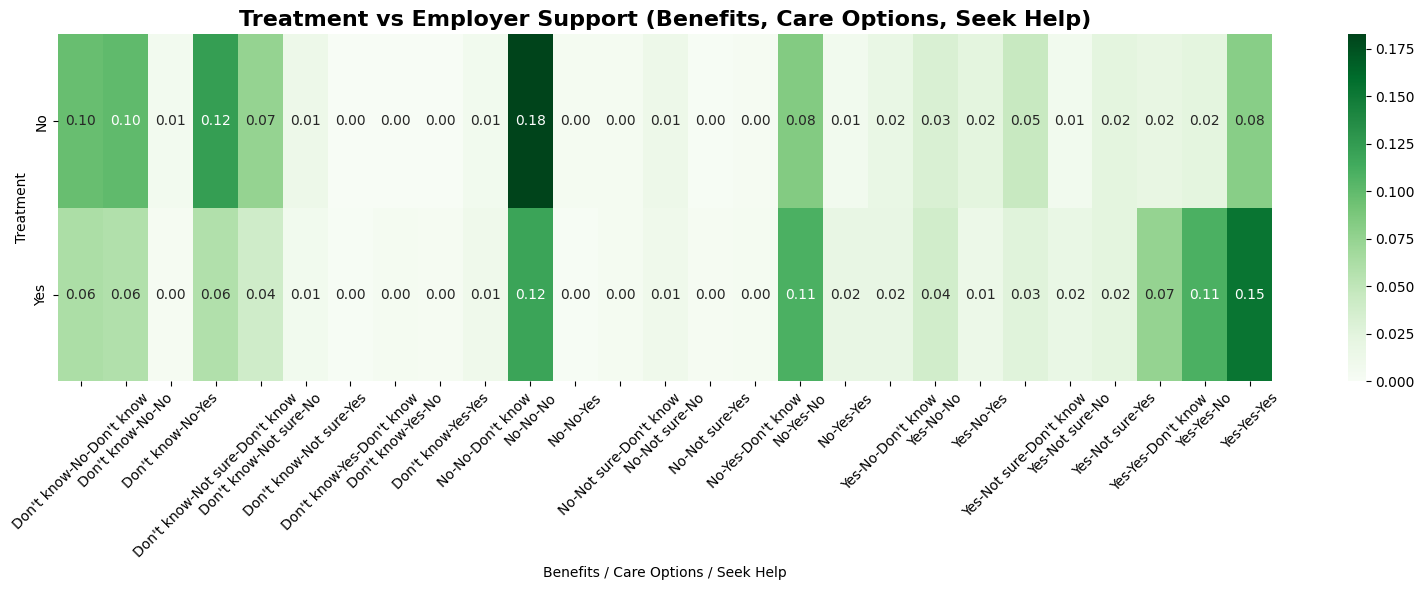

In [18]:
# crosstab between treatment and each employer support feature
cross = pd.crosstab(index=ds['treatment'],
                    columns=[ds['benefits'], ds['care_options'], ds['seek_help']])

# normalise by row to show proportions
cross_norm = pd.crosstab(index=ds['treatment'],
                         columns=[ds['benefits'], ds['care_options'], ds['seek_help']],
                         normalize='index')

cross_norm.round(2)

plt.figure(figsize=(16, 6))
sns.heatmap(cross_norm, cmap="Greens", annot=True, fmt=".2f")

plt.title('Treatment vs Employer Support (Benefits, Care Options, Seek Help)', fontsize=16, fontweight='bold')
plt.xlabel('Benefits / Care Options / Seek Help')
plt.ylabel('Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()